In [0]:
import pandas as pd

feature_df = pd.read_csv('gisette_train.data', header=None, delimiter=r"\s+")
# feature_df.head()
# feature_df.describe()

In [3]:
label_df = pd.read_csv('gisette_train.labels', header=None)
column_name = ["result"]
label_df.columns = column_name

# after adding a column name, replaced 1 and -1 with correct and incorrect values for gisette dataset labels
label_df['result'].replace(1, 'Correct', inplace=True)
label_df['result'].replace(-1, 'Incorrect', inplace=True)

label_df

,result
0,Correct
1,Incorrect
2,Correct
3,Correct
4,Correct
...,...
5995,Incorrect
5996,Correct
5997,Incorrect
5998,Incorrect


In [4]:
label_df.result.unique()

array(['Correct', 'Incorrect'], dtype=object)

In [5]:
# Use sklearn to standardise (specifically: normalise) the data so that 
# the data has a normal distribution -- mean = 0; stdev = 1
from sklearn.preprocessing import StandardScaler
import numpy as np


x = feature_df.values
x = StandardScaler().fit_transform(x)
np.mean(x),np.std(x)

(-2.17544500931884e-19, 0.9954898291795854)

In [6]:
# renaming the columns to feature names
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)
normalised_breast.tail()
normalised_breast

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,...,feature4960,feature4961,feature4962,feature4963,feature4964,feature4965,feature4966,feature4967,feature4968,feature4969,feature4970,feature4971,feature4972,feature4973,feature4974,feature4975,feature4976,feature4977,feature4978,feature4979,feature4980,feature4981,feature4982,feature4983,feature4984,feature4985,feature4986,feature4987,feature4988,feature4989,feature4990,feature4991,feature4992,feature4993,feature4994,feature4995,feature4996,feature4997,feature4998,feature4999
0,1.541220,-0.123041,0.941497,-0.036904,-0.138874,-0.257925,-0.142175,1.560614,-0.055548,-0.460474,-0.188045,-0.104191,1.718326,-0.610479,0.625881,-0.706392,3.594931,-0.140876,-0.012911,3.592139,-0.471744,-0.012911,-0.584846,-0.240966,-0.229671,1.939417,-0.021692,-0.454082,-0.012911,-0.017933,-0.149647,-0.050721,-0.140193,-0.069583,-0.562488,-0.220327,-0.060677,-0.052339,1.163008,2.218827,...,-0.167606,-0.038782,-0.125981,0.238541,0.0,0.619195,1.212147,-0.439708,-0.599615,-0.022154,3.572108,-0.386263,-0.176667,-0.115397,-0.20424,-0.316958,2.739285,1.149440,-0.163157,-0.520212,-0.425651,1.685974,-0.264640,-0.388251,-0.131395,-0.06079,-0.384879,-1.334232,-0.194959,-0.311132,-0.530165,-0.402723,-0.048717,1.598069,3.553351,-0.241703,-0.667996,-0.137595,-0.416091,2.539524
1,-0.389794,-0.123041,-0.507010,-0.036904,-0.138874,-0.257925,-0.142175,1.560614,-0.055548,-0.460474,-0.188045,-0.104191,-0.708134,-0.610479,-0.466870,-0.706392,-0.350119,-0.140876,-0.012911,-0.341362,-0.471744,-0.012911,-0.584846,-0.240966,-0.229671,1.939417,-0.021692,-0.454082,-0.012911,-0.017933,-0.149647,-0.050721,-0.140193,-0.069583,-0.562488,5.017059,-0.060677,-0.052339,-1.004613,-0.548544,...,-0.167606,-0.038782,-0.125981,1.157963,0.0,-0.695570,1.101324,2.242335,-0.599615,-0.022154,-0.352890,3.046075,-0.176667,-0.115397,-0.20424,-0.316958,-0.444574,1.149440,-0.163157,-0.520212,-0.425651,-0.733807,-0.264640,-0.388251,-0.131395,-0.06079,-0.384879,-1.334232,-0.194959,-0.311132,-0.530165,1.314338,-0.048717,1.598069,-0.316455,-0.241703,1.841290,-0.137595,-0.416091,-0.470436
2,-0.389794,-0.123041,-0.507010,-0.036904,-0.138874,-0.257925,-0.142175,-0.772203,-0.055548,-0.460474,-0.188045,-0.104191,1.718326,-0.610479,0.625881,1.728104,3.566838,-0.140876,-0.012911,-0.341362,-0.471744,-0.012911,-0.584846,-0.240966,-0.229671,1.939417,-0.021692,1.927991,-0.012911,-0.017933,-0.149647,-0.050721,-0.140193,-0.069583,-0.562488,-0.220327,-0.060677,-0.052339,-1.004613,-0.548544,...,-0.167606,-0.038782,-0.125981,1.287428,0.0,-0.695570,1.636576,-0.439708,-0.599615,-0.022154,-0.352890,-0.386263,-0.176667,-0.115397,-0.20424,-0.316958,-0.444574,0.259918,-0.163157,-0.520212,-0.425651,-0.733807,-0.264640,2.975044,-0.131395,-0.06079,-0.384879,-1.334232,-0.194959,2.397708,-0.530165,-0.402723,-0.048717,-0.756994,-0.316455,-0.241703,-0.667996,-0.137595,-0.416091,-0.470436
3,-0.389794,-0.123041,1.664288,-0.036904,-0.138874,-0.257925,-0.142175,0.862681,-0.055548,2.547359,-0.188045,-0.104191,1.718326,-0.610479,0.615246,1.314512,3.594931,-0.140876,-0.012911,-0.341362,-0.471744,-0.012911,-0.584846,-0.240966,-0.229671,1.167979,-0.021692,2.008250,-0.012911,-0.017933,-0.149647,-0.050721,-0.140193,-0.069583,2.171619,-0.220327,-0.060677,-0.052339,-1.004613,-0.548544,...,-0.167606,-0.038782,-0.125981,0.754207,0.0,-0.695570,1.018796,-0.439708,2.051097,-0.022154,2.873354,-0.386263,-0.176667,-0.115397,-0.20424,-0.316958,-0.444574,1.149440,-0.163157,1.834839,-0.425651,1.380732,-0.264640,-0.388251,-0.131395,-0.06079,-0.384879,-1.334232,-0.194959,-0.311132,-0.530165,-0.402723,-0.048717,-0.756994,-0.316455,-0.241703,1.038622,-0.137595,-0.416091,2.0

In [0]:
# Choose the first 2 principal components
from sklearn.decomposition import PCA

In [0]:
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

principal_breast_df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])

In [9]:
# in any principal component. We can find out that 2.88% is explained
# by PC1; 2.25 by PC2:
# this seems quite low, probably because of the number of features we have which is 5000!
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.02883488 0.02258951]


In [10]:
principal_breast_df

,principal component 1,principal component 2
0,27.930779,6.382479
1,18.516360,-9.880685
2,10.245842,-13.196369
3,11.003123,-3.281063
4,-13.678286,-3.769010
...,...,...
5995,-5.267408,7.004840
5996,-10.807199,1.529199
5997,4.001763,-12.656073
5998,-4.213626,-13.101620


<Figure size 432x288 with 0 Axes>

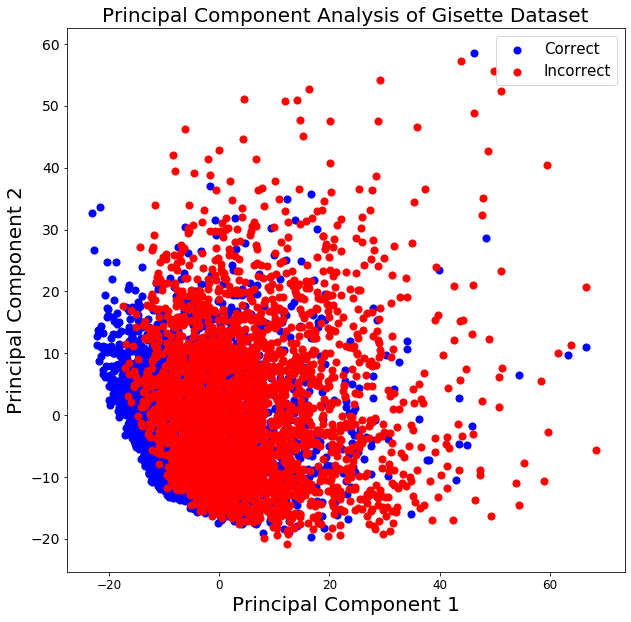

In [12]:
# Let's plot it!
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component 1',fontsize=20)
plt.ylabel('Principal Component 2',fontsize=20)
plt.title("Principal Component Analysis of Gisette Dataset",fontsize=20)
targets = ['Correct', 'Incorrect']
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = label_df == target
    plt.scatter(principal_breast_df.loc[indicesToKeep['result'], 'principal component 1']
               , principal_breast_df.loc[indicesToKeep['result'], 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [0]:
# How many principal components do we need to explain the variance in data?
pca = PCA().fit(x)

evr = pca.explained_variance_ratio_

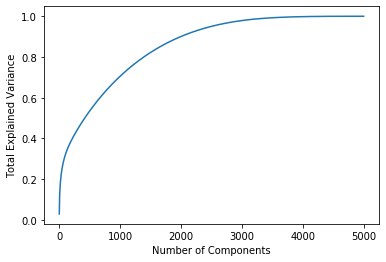

In [16]:
# Graph it...
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Total Explained Variance');